# Student Performance👨🏾‍🎓


## Learning Objectives


* Formulate  the problem
* Load the Data
* Data Exploration
* Clean The Data
* Discover and Visualize the Data to Gain Insights
* Looking for Correlations
* Prepare the Data for Machine Learning Algorithms
* Save Cleaned Data and Download it



<h2>About Data </h2>


 <h3>Read Dataset Description</h3>
We want to predict students performance in math in secondary education of two high schools. Please read the description of data set before start.

 [Dataset Description](https://archive.ics.uci.edu/ml/datasets/student+performance)

<h3>Import data</h3>
<p>
here link of raw data set: <a href="https://raw.githubusercontent.com/Ruqyai/Course-DS/master/math-raw.csv"> here</a>.

</p>

###Formulate  the problem

We want to predict the Math Final Grade

So How predict the Math Final Grade?!!

Notice the data is labeled (**Supervised Learning**)

Notice the desired output is number (**Regression**)




##Import Libraries & Load Data
----

###Import libraries




In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

###Load the dataset

In [ ]:
file_path = 'https://raw.githubusercontent.com/Ruqyai/Course-DS/master/math-raw.csv'

In [ ]:
#Use the Pandas method read_csv() to load the data from the web address.
df = pd.read_csv(file_path)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,4,?,4,1,1,3,NaN,5.0,6,6
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,5,?,3,1,1,3,NaN,5.0,5,6
2,GP,Female,15.0,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10.0,7.0,8,10
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2.0,15.0,14,15
4,GP,F,16.0,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4.0,6.0,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20.0,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11.0,9.0,9,9
391,MS,M,17.0,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3.0,14.0,16,16
392,MS,M,21.0,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3.0,10.0,8,7
393,MS,M,18.0,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0.0,11.0,12,10


##Exploring Data
----

In [ ]:
df.shape

(395, 33)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      373 non-null    object 
 1   sex         394 non-null    object 
 2   age         394 non-null    float64
 3   address     394 non-null    object 
 4   famsize     395 non-null    object 
 5   Pstatus     395 non-null    object 
 6   Medu        395 non-null    int64  
 7   Fedu        395 non-null    int64  
 8   Mjob        395 non-null    object 
 9   Fjob        395 non-null    object 
 10  reason      395 non-null    object 
 11  guardian    395 non-null    object 
 12  traveltime  395 non-null    int64  
 13  studytime   395 non-null    int64  
 14  failures    393 non-null    float64
 15  schoolsup   395 non-null    object 
 16  famsup      395 non-null    object 
 17  paid        395 non-null    object 
 18  activities  395 non-null    object 
 19  nursery     395 non-null    o

In [ ]:
df.sample(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
180,GP,M,16.0,U,GT3,T,4,3,teacher,other,...,3,4,3,2,3,3,10.0,9.0,8,8
248,GP,M,18.0,R,LE3,T,3,3,other,services,...,4,3,3,1,3,5,8.0,3.0,5,5
67,GP,F,16.0,U,GT3,T,3,1,services,other,...,4,3,3,1,2,5,4.0,7.0,7,6
186,GP,M,16.0,U,GT3,T,1,2,services,services,...,3,3,3,1,2,3,2.0,11.0,12,11
260,GP,F,18.0,U,GT3,T,4,3,services,other,...,3,1,2,1,3,2,21.0,17.0,18,18
11,NaN,F,15.0,U,GT3,T,2,1,services,other,...,5,2,2,1,1,4,4.0,10.0,12,12
205,GP,F,17.0,U,GT3,T,3,4,at_home,services,...,4,4,3,3,4,5,28.0,10.0,9,9
96,GP,M,16.0,R,GT3,T,4,3,services,other,...,3,3,3,1,1,4,2.0,11.0,15,15
95,GP,F,15.0,R,GT3,T,1,1,at_home,other,...,3,1,2,1,1,1,2.0,7.0,10,10
231,GP,M,17.0,R,GT3,T,2,2,other,other,...,4,5,2,1,1,1,4.0,11.0,11,11


##Clean  the data
----

###A.Data Format

<h4 id="correct_data_format">Correct data format</h4>
<b>We are almost there!</b>
<p>The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).</p>

In Pandas, we use
<p><b>.dtype</b> to check the data type</p>
<p><b>.astype</b> to change the data type</p>

In [ ]:
df.dtypes

school         object
sex            object
age           float64
address        object
famsize        object
Pstatus        object
Medu            int64
Fedu            int64
Mjob           object
Fjob           object
reason         object
guardian       object
traveltime      int64
studytime       int64
failures      float64
schoolsup      object
famsup         object
paid           object
activities     object
nursery        object
higher         object
internet       object
romantic       object
famrel          int64
freetime       object
goout           int64
Dalc            int64
Walc            int64
health          int64
absences      float64
G1            float64
G2              int64
G3              int64
dtype: object

In [ ]:
# TODO: Correct data format
df['freetime'] = df['freetime'].astype("float")

###B.Missing  Values
####Identify and handle missing values
As we can see, several question marks appeared in the dataframe; those are missing values which may hinder our further analysis.
<div>So, how do we identify all those missing values and deal with them?</div>


<h4>How to work with missing data?</h4>

Steps for working with missing data:
<ol>
    <li>identify missing data</li>
    <li>deal with missing data</li>
</ol>

<h4 id="identify_missing_values">1. Identify missing values</h4>

In [ ]:
# TODO : Identify missing values
df.isnull().sum()

school        22
sex            1
age            1
address        1
famsize        0
Pstatus        0
Medu           0
Fedu           0
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime     0
studytime      0
failures       2
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher         0
internet       0
romantic       0
famrel         0
freetime       2
goout          0
Dalc           0
Walc           0
health         0
absences       2
G1             2
G2             0
G3             0
dtype: int64

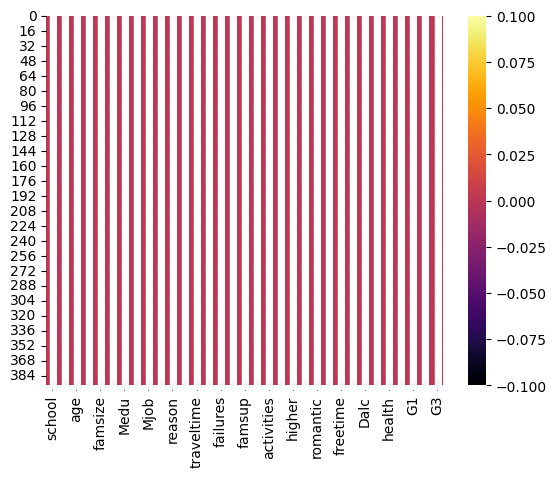

In [ ]:
# TODO: Check if there is any missing value By heatmap
sns.heatmap(df.isnull(), cmap='magma')
plt.show()

   
   <h4>Convert "?" to NaN</h4>In the house dataset, missing data comes with the question mark "?".We replace "?" with NaN (Not a Number), which is Python's default missing value marker, for reasons of computational speed and convenience. Here we use the function:  <pre>.replace(A, B, inplace = True) </pre>to replace A by B




In [ ]:
# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,4,NaN,4,1,1,3,NaN,5.0,6,6
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,5,NaN,3,1,1,3,NaN,5.0,5,6
2,GP,Female,15.0,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10.0,7.0,8,10
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2.0,15.0,14,15
4,GP,F,16.0,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4.0,6.0,10,10
5,GP,Male,16.0,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10.0,15.0,15,15
6,GP,M,16.0,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0.0,12.0,12,11
7,NaN,NaN,NaN,NaN,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6.0,6.0,5,6
8,NaN,M,15.0,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0.0,16.0,18,19
9,NaN,M,15.0,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0.0,14.0,15,15


In [ ]:
df.isnull().sum()

school        22
sex            1
age            1
address        1
famsize        0
Pstatus        0
Medu           0
Fedu           0
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime     0
studytime      0
failures       2
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher         0
internet       0
romantic       0
famrel         0
freetime       2
goout          0
Dalc           0
Walc           0
health         0
absences       2
G1             2
G2             0
G3             0
dtype: int64

In [ ]:
df['school'].value_counts()

GP    327
MS     46
Name: school, dtype: int64

<h4 id="deal_missing_values">2. Deal with missing data</h4>
<b>How to deal with missing data?</b>

<ol>
    <li>drop data<br>
        a. drop the whole row<br>
        b. drop the whole column
    </li>
    <li>replace data (impute)<br>
        a. replace it by mean or median <br>
        b. replace it by frequency<br>
        c. replace it based on inference or other functions
    </li>
</ol>

<h4>Drop the whole row</h4>

In [ ]:
# TODO:Drop the whole row

<h4>Drop the whole column</h4>

In [ ]:
# TODO: Drop the whole column

<h4> Replace it by mean </h4>

In [ ]:
# TODO: Replace it by mean
df['age'] = df['age'].fillna(df['age'].mean())
df['G1'] = df['G1'].fillna(df['G1'].mean())
df['freetime'] = df['freetime'].fillna(df['freetime'].mean())
df['failures'] = df['failures'].fillna(df['failures'].mean())

<h4>Replace by frequency</h4>

In [ ]:
# TODO: Replace by frequency
df['school'] = df['school'].fillna(df['school'].value_counts().idxmax())
df['sex'] = df['sex'].fillna(df['sex'].value_counts().idxmax())
df['address'] = df['address'].fillna(df['address'].value_counts().idxmax())
df['absences'] = df['absences'].fillna(df['absences'].value_counts().idxmax())

<h4> Replace by sklearn.impute </h4>

In [ ]:
# TODO: Replace by sklearn.impute

In [ ]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

###C.Dealing with Duplicates


<h4>Remove any duplicates</h4>


In [ ]:
# TODO: Remove any duplicates
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

###D.Data Standardization
<p>
Data is usually collected from different agencies with different formats.
(Data Standardization is also a term for a particular type of data normalization)
</p>
    
<b>What is Standardization?</b>
<p>Standardization is the process of transforming data into a common format which allows the researcher to make the meaningful comparison.
</p>

In [ ]:
df['sex'].value_counts()

F         207
M         186
Female      1
Male        1
Name: sex, dtype: int64

In [ ]:
df.replace("Female", 'F', inplace = True)
df.replace("Male", 'M', inplace = True)

In [ ]:
df['sex'].value_counts()

F    208
M    187
Name: sex, dtype: int64

###E.Data Normalization

<b>Why normalization?</b>
<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling variable so the variable values range from 0 to 1
</p>

##Exploratory Data Analysis (EDA) and Data Visualization
----


Categorical variables are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.


###Identify Outliers

<Axes: >

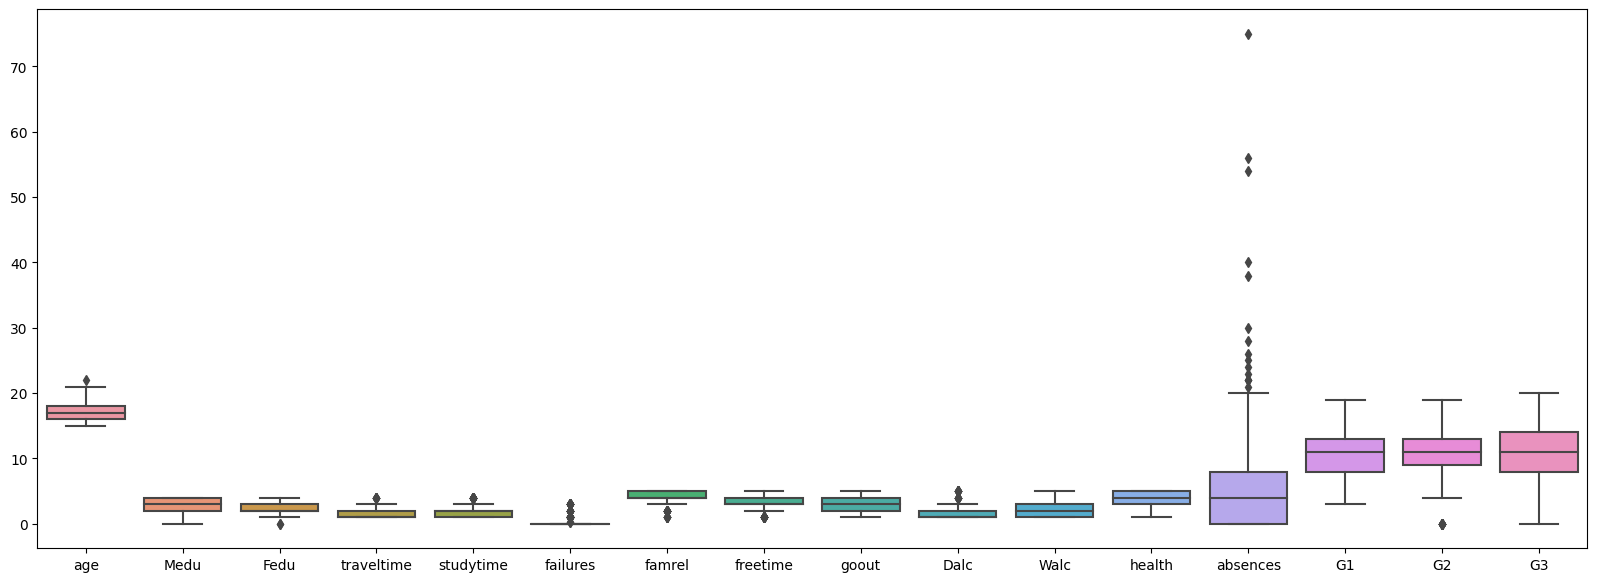

In [ ]:
plt.figure(figsize=(20,7))
sns.boxplot(data=df)

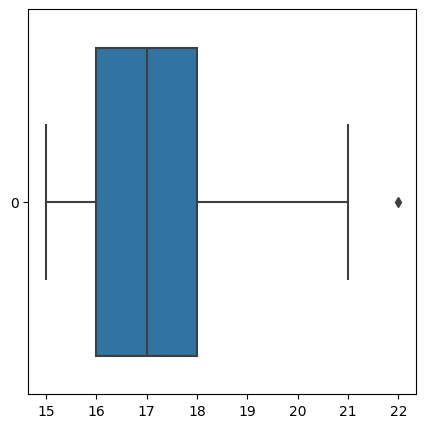

In [ ]:
# TODO: Identify Outliers
plt.figure(figsize=(5,5))
sns.boxplot(df['age'].values, orient='h')
plt.show()

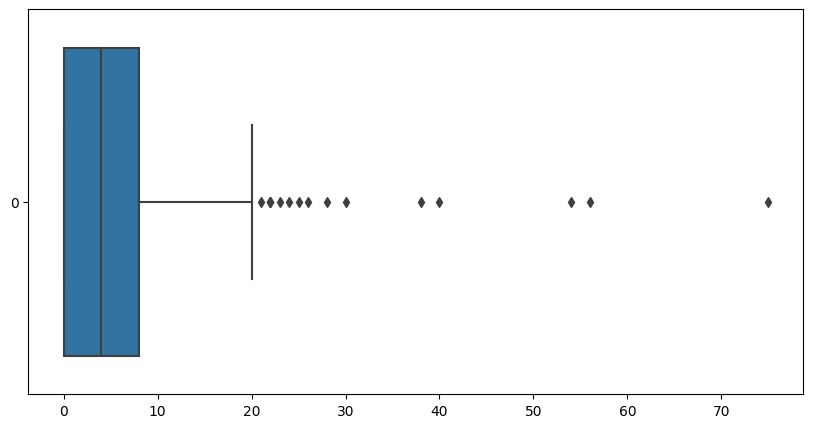

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(df['absences'].values, orient='h')
plt.show()

###Remove Outliers

In [ ]:
# TODO:  Remove Outliers
df['absences'] = df['absences'].clip(0, 30)

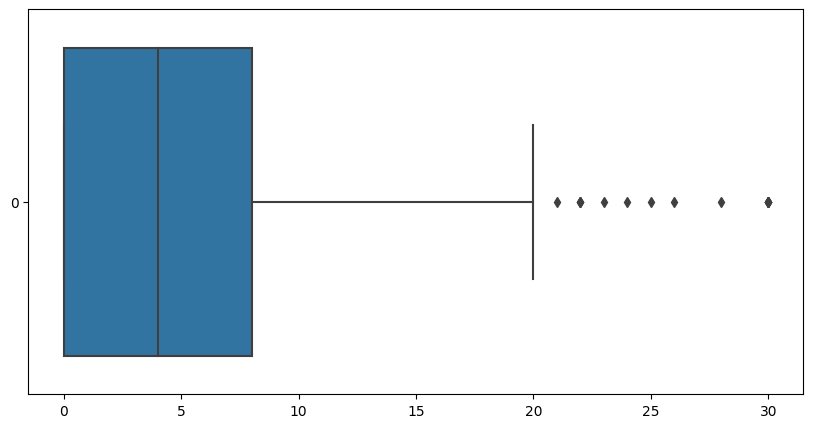

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(df['absences'].values, orient='h')
plt.show()

###Discover and Visualize the Data to Gain Insights

<h4>Individual Variables </h4>


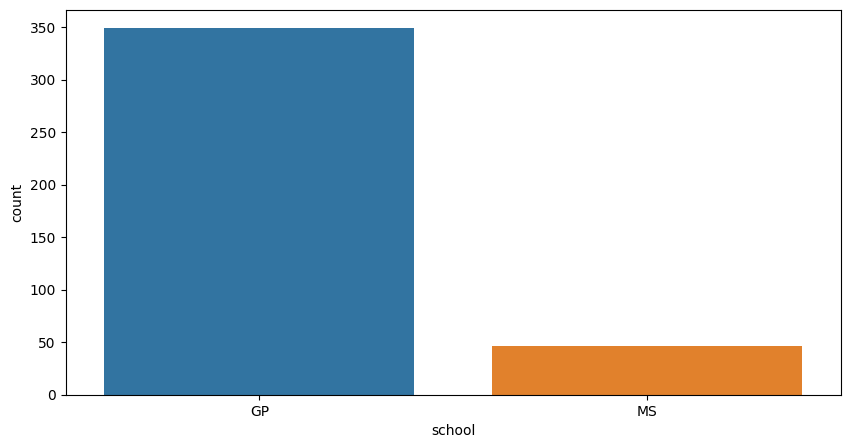

In [ ]:
# TODO: Show Individual Variable as graph
plt.figure(figsize=(10,5))
sns.countplot(x='school', data=df, palette='tab10')
plt.show()

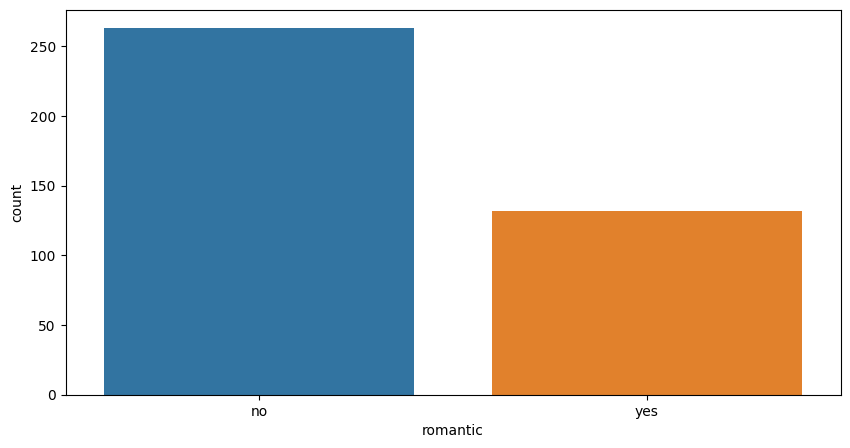

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='romantic', data=df, palette='tab10')
plt.show()

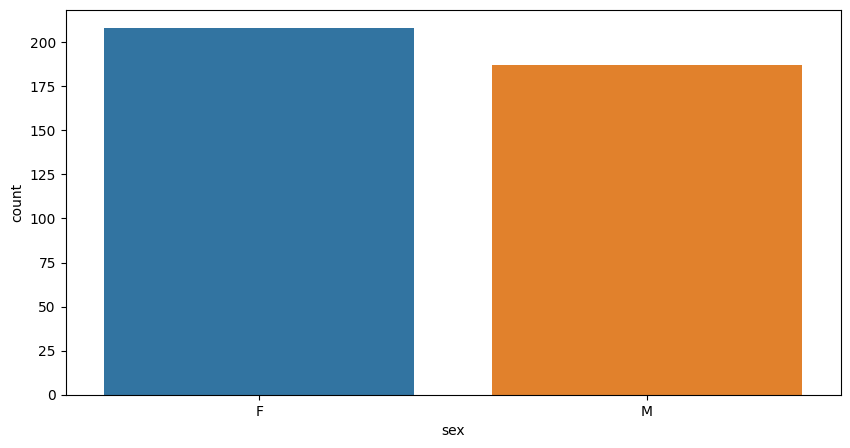

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='sex', data=df, palette='tab10')
plt.show()

<h4>Relationships Between Variables</h4>

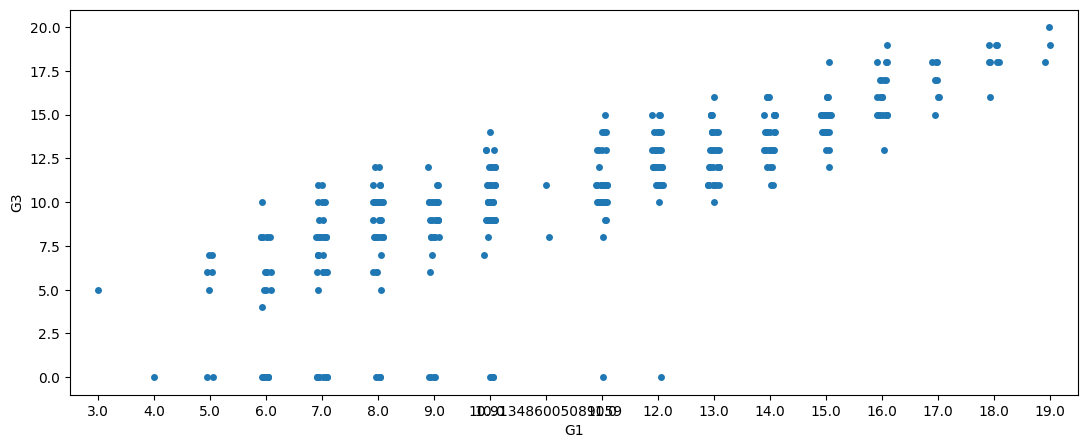

In [ ]:
 # TODO: Show relationship between two Variables
plt.figure(figsize=(13, 5))
sns.stripplot(x="G1", y="G3", data=df);

<h4>Weak and Strong Relationships<h4>

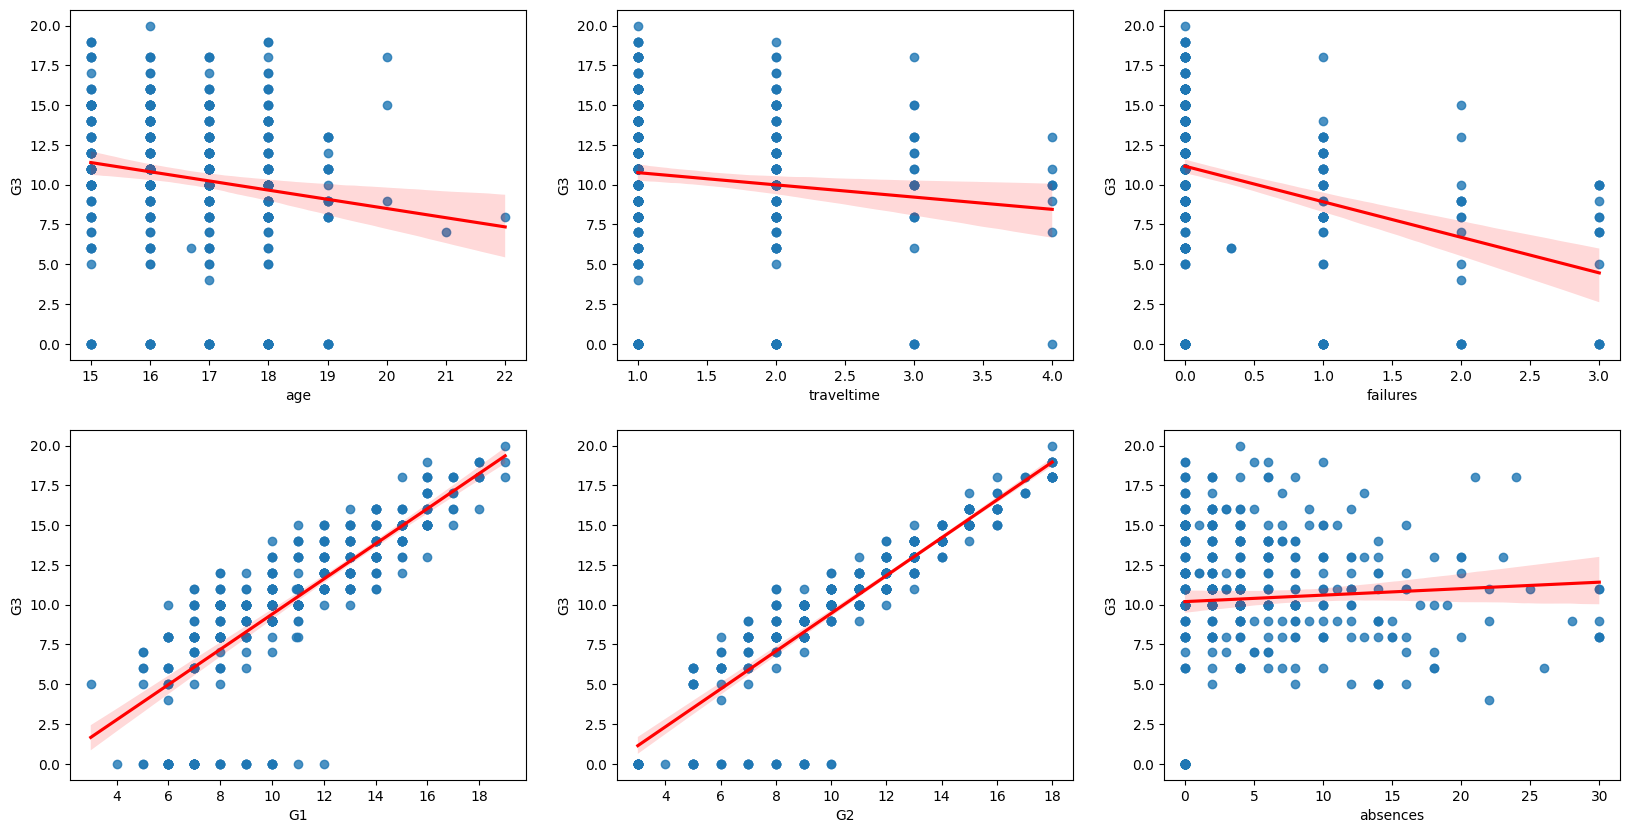

In [ ]:
# TODO: Show some weak and Strong Relationships
plt.figure(figsize=(20,10))

plt.subplot(231)#subplot to add a subplot to the current figure
sns.regplot(x='age', y='G3', data=df,  line_kws={'color': 'red'})

plt.subplot(232)
sns.regplot(x='traveltime', y='G3', data=df , line_kws={'color': 'red'})

plt.subplot(233)
sns.regplot(x='failures', y='G3', data=df,  line_kws={'color': 'red'})

plt.subplot(234)
sns.regplot(x='G1', y='G3', data=df , line_kws={'color': 'red'})

plt.subplot(235)
sns.regplot(x='G2', y='G3', data=df , line_kws={'color': 'red'})

plt.subplot(236)
sns.regplot(x='absences', y='G3', data=df , line_kws={'color': 'red'})
plt.show()

###Looking for Correlations
<h3>Correlation and Causation</h3>

<b> Correlation: </b> a measure of the extent of interdependence between variables.

<b> Causation: </b>the relationship between cause and effect between two variables.

It is important to know the difference between these two and that correlation does not imply causation. Determining correlation is much simpler the determining causation as causation may require independent experimentation.

<ipython-input-185-98f76863e6a9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".1f", cmap="inferno")


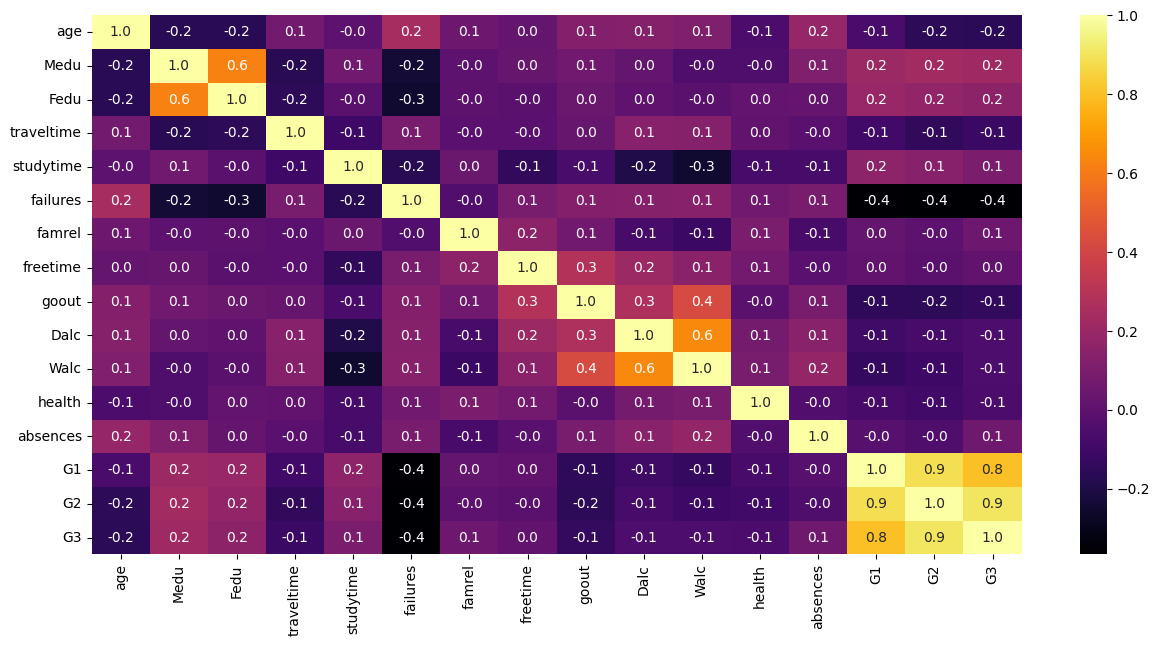

In [ ]:
# OTDO : Show the Correlation between variables
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, fmt=".1f", cmap="inferno")
plt.show()

##Feature  Engineering
----

* Construct new features
* Combine two features or uncombine a feature
*	Select features

<h3>Conclusion: Important Variables</h3>
We now have a better idea of what our data looks like and which variables are important to take into account when predicting the house price.


###Select features

In [ ]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
# TODO: Select the important features
selected_features = ['G3', 'G1', 'G2', 'absences', 'freetime', 'famrel', 'studytime', 'Fedu', 'Medu']
df_final = df[selected_features]
df_final

,G3,G1,G2,absences,freetime,famrel,studytime,Fedu,Medu
0,6,5.0,6,0.0,3.236641,4,2,4,4
1,6,5.0,5,0.0,3.236641,5,2,1,1
2,10,7.0,8,10.0,3.000000,4,2,1,1
3,15,15.0,14,2.0,2.000000,3,3,2,4
4,10,6.0,10,4.0,3.000000,4,2,3,3
...,...,...,...,...,...,...,...,...,...
390,9,9.0,9,11.0,5.000000,5,2,2,2
391,16,14.0,16,3.0,4.000000,2,1,1,3
392,7,10.0,8,3.0,5.000000,5,1,1,1
393,10,11.0,12,0.0,4.000000,4,1,2,3


<h3>Save Cleaned Data and Download it <h3>

In [ ]:
#df_final.to_csv('cleaned_data.csv')

In [ ]:
#from google.colab import files
#files.download('cleaned_data.csv')

##Data Preprocessing
----

####A.LabelEncoder

In [ ]:
df_final

,G3,G1,G2,absences,freetime,famrel,studytime,Fedu,Medu
0,6,5.0,6,0.0,3.236641,4,2,4,4
1,6,5.0,5,0.0,3.236641,5,2,1,1
2,10,7.0,8,10.0,3.000000,4,2,1,1
3,15,15.0,14,2.0,2.000000,3,3,2,4
4,10,6.0,10,4.0,3.000000,4,2,3,3
...,...,...,...,...,...,...,...,...,...
390,9,9.0,9,11.0,5.000000,5,2,2,2
391,16,14.0,16,3.0,4.000000,2,1,1,3
392,7,10.0,8,3.0,5.000000,5,1,1,1
393,10,11.0,12,0.0,4.000000,4,1,2,3


In [ ]:
# TODO: Use LabelEncoder
from sklearn.preprocessing import LabelEncoder
cat = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup' ,'paid', 'activities', 'nursery', 'higher' ,'internet', 'romantic']
le = LabelEncoder()
df[cat] = df[cat].apply(le.fit_transform)

####B.Separate features and target columns

In [ ]:
df_final

,G3,G1,G2,absences,freetime,famrel,studytime,Fedu,Medu
0,6,5.0,6,0.0,3.236641,4,2,4,4
1,6,5.0,5,0.0,3.236641,5,2,1,1
2,10,7.0,8,10.0,3.000000,4,2,1,1
3,15,15.0,14,2.0,2.000000,3,3,2,4
4,10,6.0,10,4.0,3.000000,4,2,3,3
...,...,...,...,...,...,...,...,...,...
390,9,9.0,9,11.0,5.000000,5,2,2,2
391,16,14.0,16,3.0,4.000000,2,1,1,3
392,7,10.0,8,3.0,5.000000,5,1,1,1
393,10,11.0,12,0.0,4.000000,4,1,2,3


In [ ]:
x = df_final.iloc[:,df_final.columns != "G3"]
y = df_final.iloc[:,0]

In [ ]:
x

,G1,G2,absences,freetime,famrel,studytime,Fedu,Medu
0,5.0,6,0.0,3.236641,4,2,4,4
1,5.0,5,0.0,3.236641,5,2,1,1
2,7.0,8,10.0,3.000000,4,2,1,1
3,15.0,14,2.0,2.000000,3,3,2,4
4,6.0,10,4.0,3.000000,4,2,3,3
...,...,...,...,...,...,...,...,...
390,9.0,9,11.0,5.000000,5,2,2,2
391,14.0,16,3.0,4.000000,2,1,1,3
392,10.0,8,3.0,5.000000,5,1,1,1
393,11.0,12,0.0,4.000000,4,1,2,3


In [ ]:
y

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

 #### C.Split the dataset for training and testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

##Model Building
----


In [ ]:
from sklearn import linear_model
# Bulid a new Model
regression = linear_model.LinearRegression()
# Train the Model
regression.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict for training set
y_train_predict = regression.predict(X_train)
y_test_predict = regression.predict(X_test)

In [ ]:
y_test_predict

array([10.59868904, 15.24308577,  8.92752214,  5.88651643,  1.05557756,
       15.23122028,  7.52310745,  7.22084551,  7.0987663 , 12.74798016,
        9.3551841 ,  6.58838253, 16.6056    ,  6.38945231,  9.88388336,
        9.71247144,  9.12365068, 14.60571938,  9.5304223 , 10.20438825,
       19.19110666,  8.6922274 ,  8.08703601, 12.28479962,  7.08886372,
        8.84424444,  9.20271105, 11.71761992,  7.88793239, 19.82061   ,
        8.58332395, 16.29297196, 10.8909835 ,  9.66057329,  6.74432292,
       14.71131947,  8.6047343 ,  5.60301995, 15.6247614 , 11.58032846,
        8.30129474, 15.609923  ,  0.86722108,  5.8259959 , 18.76698125,
        7.61242596,  9.03494199,  0.79012276,  3.3249547 , 10.68163681,
        9.14198546, 11.295906  ,  8.7885086 , 16.14248524,  5.55326885,
       14.10978864, 12.71374218, 13.88349309, 14.41062686, 11.94577069,
        1.16753034, 17.07679058,  6.48884582, 13.93890119, 15.04763943,
        4.29415257, 19.57533784,  8.89278755, 10.5765023 ,  8.59

####Evaluate model performance

In [ ]:
from sklearn.metrics import mean_squared_error , mean_absolute_error


# # model evaluation for training set
# mse_train = mean_squared_error(y_train, y_train_predict)
# mae_train = mean_absolute_error(y_train, y_train_predict)
# print("The model performance for training set")
# print('RMSE is {}'.format(np.sqrt(mse_train)))
# print('MAE is {}'.format(mae_train))
# print("---------------------------------------")

# model evaluation for testing set
mse_test = mean_squared_error(y_test, y_test_predict) # Return the loss it is non-negative . The best value is 0.0
mae_test = mean_absolute_error(y_test, y_test_predict) # Return the loss it is non-negative . The best value is 0.0
print("The model performance for testing set")
print('RMSE is {}'.format(np.sqrt(mse_test)))
print('MAE is {}'.format(mae_test))

print("---------------------------------------")
test_score= regression.score(X_test, y_test)# Return R2 score . The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse)
print("The score of model for testing set")
print('Test score {}'.format(test_score.round(2)))

The model performance for testing set
RMSE is 2.085810805238598
MAE is 1.3045709889438886
---------------------------------------
The score of model for testing set
Test score 0.82


In [ ]:
compare={"Actual": y_test, "Predict": y_test_predict}
pd.DataFrame(compare)

,Actual,Predict
231,11,10.598689
158,15,15.243086
274,10,8.927522
203,6,5.886516
136,0,1.055578
...,...,...
72,5,4.069685
178,9,7.874455
374,19,18.938941
348,15,15.180220


In [ ]:
idx= np.random.choice(X_test.shape[0])
print("Predicted G3 :", y_test_predict[idx])
print("Actual G3 :", y_test[idx])

Predicted G3 : 9.71247144105462
Actual G3 : 14


####Visualize the Result

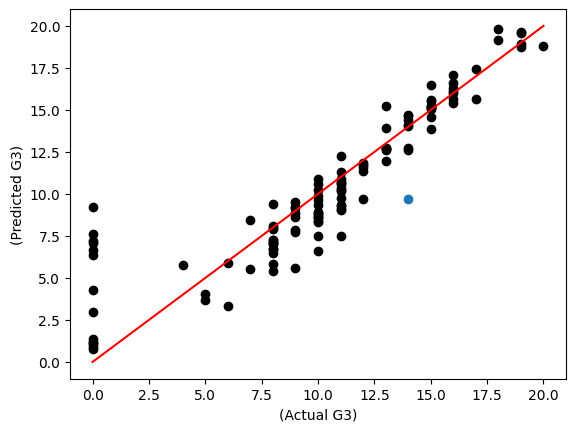

In [ ]:
# visualization
plt.scatter(y_test, y_test_predict,  color='black')
plt.scatter(y_test[idx], y_test_predict[idx])
plt.xlabel('(Actual G3)')
plt.ylabel('(Predicted G3)')
plt.plot([df_final['G3'].min(), df_final['G3'].max()], [df_final['G3'].min(), df_final['G3'].max()], color='red')
plt.show()

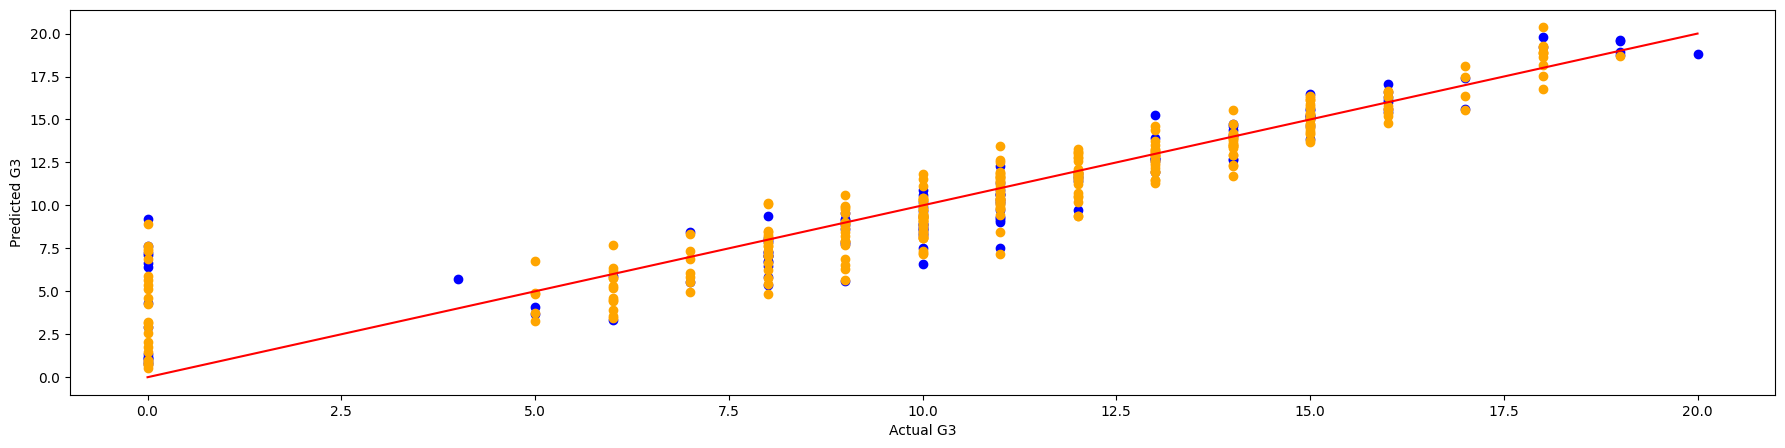

In [ ]:
plt.figure(figsize=(22,5))
plt.scatter(y_test, y_test_predict,  color='blue')
plt.scatter(y_train, y_train_predict,  color='Orange')
plt.plot([df_final['G3'].min(), df_final['G3'].max()], [df_final['G3'].min(), df_final['G3'].max()], color='red')
plt.xlabel('Actual G3')
plt.ylabel('Predicted G3')
plt.show()

####Save model and Use it

In [ ]:
# Save the model
import pickle
filename = 'model.pkl'
pickle.dump(regression, open(filename, 'wb')) # w = write b ==binary mode

In [ ]:
# Load the saved model
model_load = pickle.load(open(filename, 'rb')) # r = read b ==binary mode

In [ ]:
df_final

,G3,G1,G2,absences,freetime,famrel,studytime,Fedu,Medu
0,6,5.0,6,0.0,3.236641,4,2,4,4
1,6,5.0,5,0.0,3.236641,5,2,1,1
2,10,7.0,8,10.0,3.000000,4,2,1,1
3,15,15.0,14,2.0,2.000000,3,3,2,4
4,10,6.0,10,4.0,3.000000,4,2,3,3
...,...,...,...,...,...,...,...,...,...
390,9,9.0,9,11.0,5.000000,5,2,2,2
391,16,14.0,16,3.0,4.000000,2,1,1,3
392,7,10.0,8,3.0,5.000000,5,1,1,1
393,10,11.0,12,0.0,4.000000,4,1,2,3


In [ ]:
# use the saved model for prediction
import os

# Recall the features
exmaple_input= [0, 0, 0, 0, 0, 0, 0, 0]
exmaple_input[0] = input('Enter the G1: ')
exmaple_input[1] = input('Enter the G2: ')
exmaple_input[2] = input('Enter the number of absences: ')
exmaple_input[3] = input('Enter the free time after school (numeric: from 1 - very low to 5 - very high): ')
exmaple_input[4] = input('Enter the quality of family relationships (numeric: from 1 - very bad to 5 - excellent): ')
exmaple_input[5] = input('Enter the weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours): ')
exmaple_input[6] = input('Enter the father education (numeric: 0 - none,  1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education): ')
exmaple_input[7] = input('Enter the mother education (numeric: 0 - none,  1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education): ')

exmaple_input = [int(i) for i in exmaple_input] # to convert from string to integer
exmaple_predict = regression.predict(np.array( [exmaple_input,]))
print("The predicted G3 is : {}".format(exmaple_predict[0].round(2)))

Enter the G1: 2
Enter the G2: 14
Enter the number of absences: 20
Enter the free time after school (numeric: from 1 - very low to 5 - very high): 3
Enter the quality of family relationships (numeric: from 1 - very bad to 5 - excellent): 5
Enter the weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours): 4
Enter the father education (numeric: 0 - none,  1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education): 2
Enter the mother education (numeric: 0 - none,  1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education): 3
The predicted G3 is : 15.23 $ 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# downlodel your model
from google.colab import files
files.download('model.pkl')